# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

#url = url + "q=" + city + "&appid=" + weather_api_key
#response = print(requests.get(url))


In [6]:
#city1 = 'New York'
#city_url = url + "q=" + city1 + "&appid=" + weather_api_key

#print(requests.get(city_url).json())

In [7]:


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | kailua-kona
Processing Record 4 of Set 1 | prado
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | misratah
Processing Record 8 of Set 1 | st. john's
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | puerto quijarro
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | bandar-e lengeh
Processing Record 15 of Set 1 | rong'an
Processing Record 16 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | puerto armuelles
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Reco

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
city_data_df.count()


City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luderitz,-26.6481,15.1594,286.81,90,1,5.09,NA,1723415588
1,port-aux-francais,-49.3500,70.2167,277.98,96,100,15.31,TF,1723415589
2,kailua-kona,19.6406,-155.9956,303.86,76,0,6.69,US,1723415591
3,prado,-17.3411,-39.2208,294.84,87,100,2.91,BR,1723415592
4,olonkinbyen,70.9221,-8.7187,275.88,87,100,4.82,SJ,1723415593


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,286.81,90,1,5.09,NaN,1723415588
1,port-aux-francais,-49.3500,70.2167,277.98,96,100,15.31,TF,1723415589
2,kailua-kona,19.6406,-155.9956,303.86,76,0,6.69,US,1723415591
3,prado,-17.3411,-39.2208,294.84,87,100,2.91,BR,1723415592
4,olonkinbyen,70.9221,-8.7187,275.88,87,100,4.82,SJ,1723415593


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

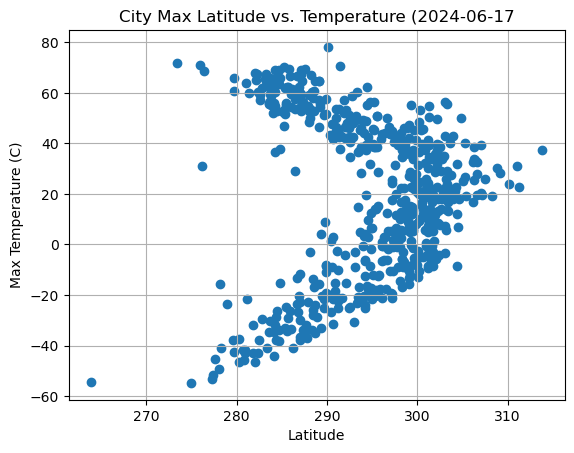

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Max Temp'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-06-17')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

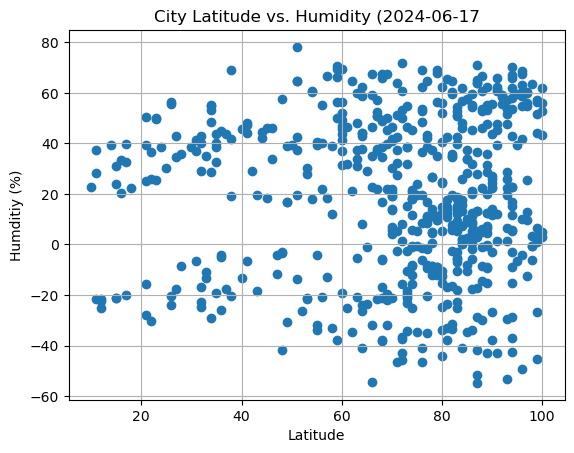

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Humidity'],city_data_df['Lat'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-06-17')
plt.ylabel('Humditiy (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

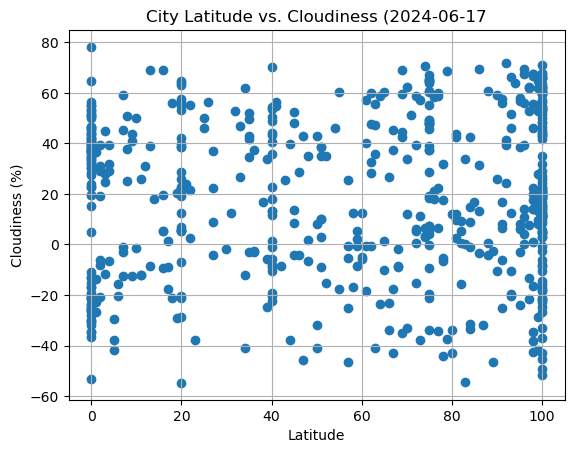

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Cloudiness'],city_data_df['Lat'])


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-06-17')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

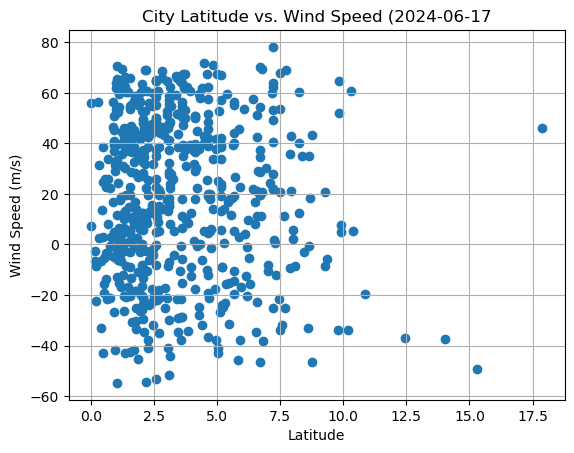

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Wind Speed'],city_data_df['Lat'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-06-17')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
def linear_regression(xaxis, yaxis):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
    regress = xaxis + slope + intercept 
    line_equation = 'y = '+ str(round(slope,2)) +  "x + " + str(round(intercept,2))
    plt.scatter(xaxis,yaxis)
    print(f'The r-value is: {rvalue**2}  {line_equation}')


In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kailua-kona,19.6406,-155.9956,303.86,76,0,6.69,US,1723415591
4,olonkinbyen,70.9221,-8.7187,275.88,87,100,4.82,SJ,1723415593
6,misratah,32.3754,15.0925,300.89,71,0,3.09,LY,1723415595
7,st. john's,47.5649,-52.7093,292.68,91,75,3.09,CA,1723415422
11,ilulissat,69.2167,-51.1000,287.16,38,69,7.72,GL,1723415601


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,286.81,90,1,5.09,NaN,1723415588
1,port-aux-francais,-49.3500,70.2167,277.98,96,100,15.31,TF,1723415589
3,prado,-17.3411,-39.2208,294.84,87,100,2.91,BR,1723415592
5,edinburgh of the seven seas,-37.0676,-12.3116,287.78,94,100,12.46,SH,1723415594
8,margaret river,-33.9500,115.0667,288.31,55,80,10.17,AU,1723415597


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4399149179460481  y = -0.24x + 304.05


NameError: name 'xaxis' is not defined

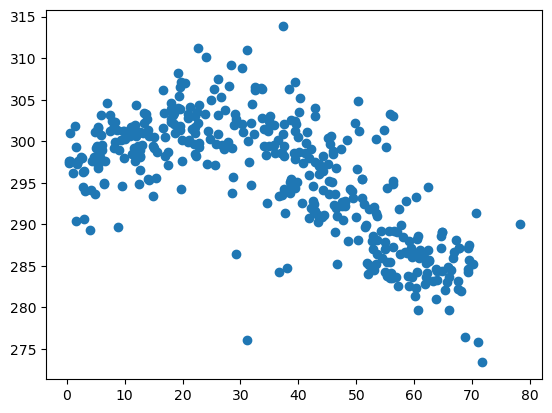

In [70]:
# Linear regression on Northern Hemisphere

linear_regression(xaxis = northern_hemi_df['Lat'], yaxis = northern_hemi_df['Max Temp'])
plt.plot(xaxis, regress,'r-')
plt.annotate(line_equation,(10, 350) , color = 'red')
plt.title('Latitude vs Max Temp')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')

plt.show()


The r-value is: 0.6935085220395683  y = 0.43x + 300.01


NameError: name 'line_eq' is not defined

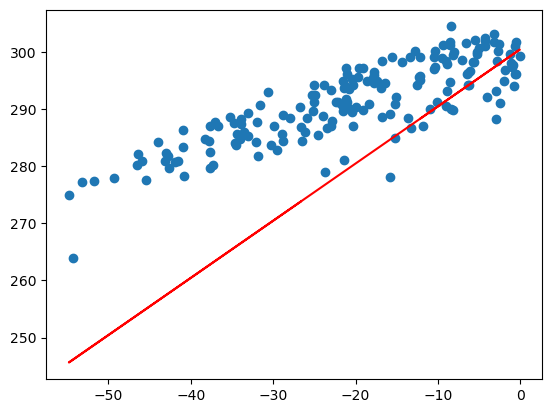

In [60]:
# Linear regression on Southern Hemisphere
linear_regression(xaxis = southern_hemi_df['Lat'], yaxis = southern_hemi_df['Max Temp'])
plt.annotate(line_eq,(-25, 255) , color = 'red')
plt.title('Latitude vs Max Temp')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** 
We can see that the northern hemisphere with an r value of 0.4399149179460481 has a lower modteraly positive correlation to th max temperature comapred to the souther hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01180773024339452  y = -0.12x + 75.93


NameError: name 'line_eq' is not defined

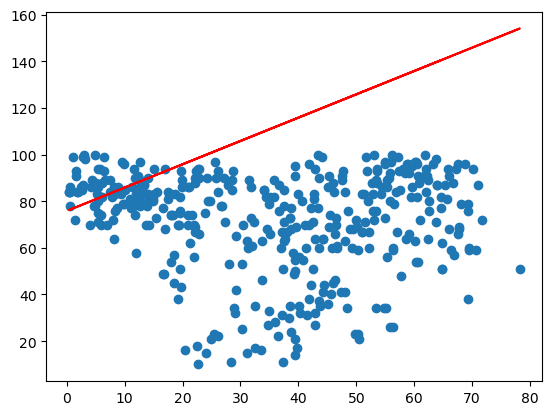

In [61]:
# Northern Hemisphere
linear_regression(xaxis = northern_hemi_df['Lat'], yaxis = northern_hemi_df['Humidity'])
plt.annotate(line_eq,(15, 120) , color = 'red')
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()

The r-value is: 0.0006744254164079168  y = -0.04x + 67.44


NameError: name 'line_eq' is not defined

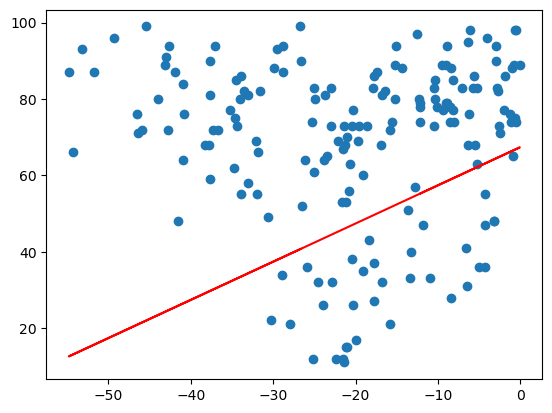

In [62]:
# Southern Hemisphere
linear_regression(xaxis = southern_hemi_df['Lat'], yaxis = southern_hemi_df['Humidity'])
plt.annotate(line_eq,(-55, 30) , color = 'red')
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.002030478353309721  y = -0.08x + 60.56


NameError: name 'line_eq' is not defined

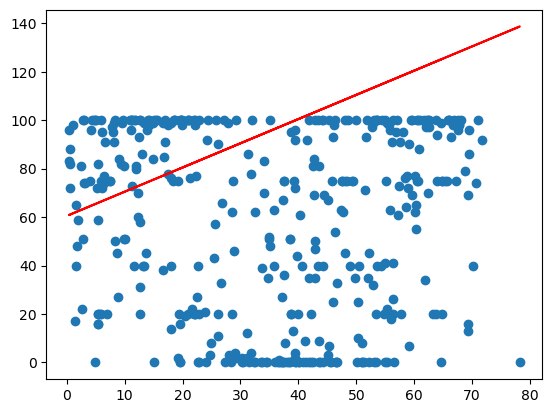

In [63]:
# Northern Hemisphere
linear_regression(xaxis = northern_hemi_df['Lat'], yaxis = northern_hemi_df['Cloudiness'])
plt.annotate(line_eq,(15, 120) , color = 'red')
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()

The r-value is: 0.0034743607357397995  y = -0.16x + 46.44


NameError: name 'line_eq' is not defined

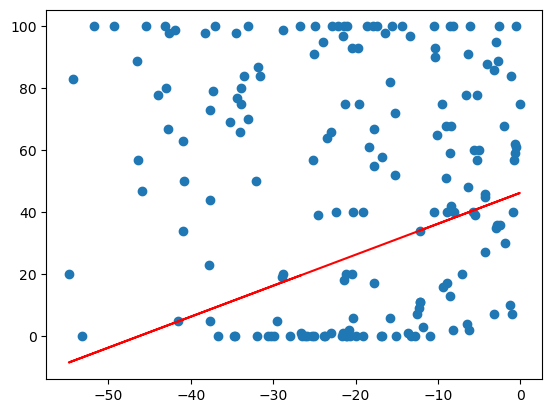

In [64]:
# Southern Hemisphere
linear_regression(xaxis = southern_hemi_df['Lat'], yaxis = southern_hemi_df['Cloudiness'])
plt.annotate(line_eq,(-55, 30) , color = 'red')
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 5.330102425304167e-05  y = 0.0x + 3.45


NameError: name 'line_eq' is not defined

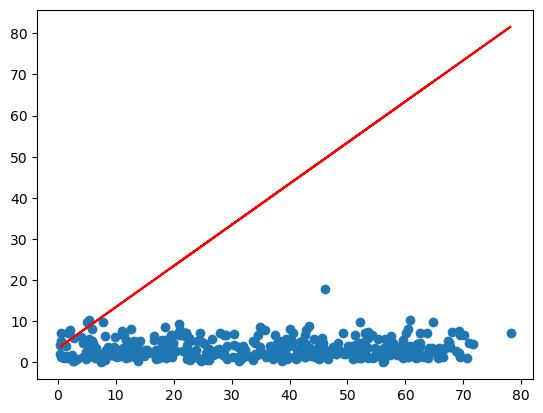

In [65]:
# Northern Hemisphere
linear_regression(xaxis = northern_hemi_df['Lat'], yaxis = northern_hemi_df['Wind Speed'])
plt.annotate(line_eq,(40, 30) , color = 'red')
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()

The r-value is: 0.03774779657990049  y = -0.04x + 2.82


NameError: name 'line_eq' is not defined

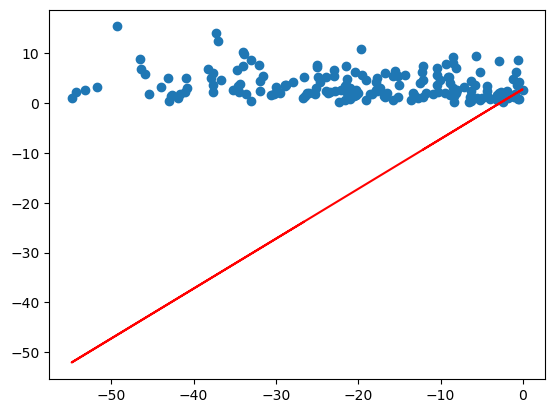

In [66]:
# Southern Hemisphere
linear_regression(xaxis = southern_hemi_df['Lat'], yaxis = southern_hemi_df['Wind Speed'])
plt.annotate(line_eq,(-30, -45) , color = 'red')
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE